## install libs

In [38]:
%pip install xlwt


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ------------------------------------ 100.0/100.0 kB 717.9 kB/s eta 0:00:00


In [3]:
%pip install pandas

In [50]:
%pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [95]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [4]:
%pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install spacy
%pip install Counter

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install Sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install seaborn

You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## importing libs

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import string
from string import digits
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import cohen_kappa_score as qwk
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.pipeline import Pipeline
from spell import spell_check
from Lemma import lemmatization
from textblob import TextBlob

### data cleaning

In [2]:
data = pd.read_excel('Dataset/Analisis_Essay_Grading_Politik.xlsx')
print('Total dataset: ', len(data))
data.head()

Total dataset:  535


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,Partai politik sebagai organisasi resmi untuk ...,siswa_1,1. Untuk memperkenalkan nilai-nilai politik 2....,45.000000,35,50,50
1,1,Partai politik sebagai organisasi resmi untuk ...,siswa_2,1. sebagai sarana komunikasi politik 2. sebaga...,55.000000,45,70,50
2,1,Partai politik sebagai organisasi resmi untuk ...,siswa_3,"sebagai penyalur aspirasi rakyat, sebagai temp...",25.666667,22,30,25
3,1,Partai politik sebagai organisasi resmi untuk ...,siswa_4,Untuk mengaspirasikan suara rakyat indonesia.,21.000000,18,20,25
4,1,Partai politik sebagai organisasi resmi untuk ...,siswa_6,1.Cara untuk memperkenalkan nilai-nilai politi...,30.333333,30,36,25


#### duplicate data

In [3]:
copydata = data.copy()
data_lemma = data.copy()
data_stem = data.copy()

### Modelling

#### Pre-processing

In [4]:
#--------------------------------case folding---------------------------------
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['Kunci Jawaban']=data['Kunci Jawaban'].map(lambda m:re.sub(pattern," ",m))
  copydata['Jawaban']=data['Jawaban'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].map(lambda m:m.lower())
  copydata['Jawaban']=copydata['Jawaban'].map(lambda m:m.lower())
  return copydata
# ------------------------------------------------------------------------------

# ----------------------------Tokenization--------------------------------------
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['Kunci Jawaban']= copydata['Kunci Jawaban'].apply(lambda x: tokenization(x))
  copydata['Jawaban']= copydata['Jawaban'].apply(lambda x: tokenization(x))
  return copydata

def spellcheck(copydata):
  copydata['Kunci Jawaban'] = copydata['Kunci Jawaban'].apply(lambda x: spell_check(x))
  copydata['Jawaban'] = copydata['Jawaban'].apply(lambda x: spell_check(x))
  return copydata
# ------------------------------------------------------------------------------

# --------------------------------------Filtering-------------------------------
sw= nltk.corpus.stopwords.words('indonesian')
new_stopwords = ['versi','android', 'api', 'level']
sw.extend(new_stopwords)

def remove_SW(copydata):
   copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if not item in sw])
   copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if not item in sw])
   return copydata

def remove_digits(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if item.isalpha()])
  copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if item.isalpha()])
  return copydata

# ------------------------------------------------------------------------------

# -------------------------------Stemming---------------------------------------
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(data_stem):
  data_stem['Kunci Jawaban']=data_stem['Kunci Jawaban'].apply(lambda x: [stemmer.stem(item) for item in x])
  data_stem['Jawaban']=data_stem['Jawaban'].apply(lambda x: [stemmer.stem(item) for item in x])
  return data_stem

def lemma(data_lemma):
  data_lemma['Kunci Jawaban']=data_lemma['Kunci Jawaban'].apply(lambda x: lemmatization(x))
  data_lemma['Jawaban']=data_lemma['Jawaban'].apply(lambda x: lemmatization(x))
  return data_lemma

def remove_empty_tokens(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if item !=''])
  copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['Kunci Jawaban']= copydata['Kunci Jawaban'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Jawaban']= copydata['Jawaban'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
  
def remove_space(copydata):
  copydata['Kunci Jawaban']= copydata['Kunci Jawaban'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Jawaban']= copydata['Jawaban'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

##### Case folding

In [5]:
case_fold = copydata.pipe(remove_punc).pipe(lower)
writer = pd.ExcelWriter('Result - Politik.xlsx')
case_fold.to_excel(writer, 'Case Folding')
writer.save()

print("Case folding results")
copydata.head()


Case folding results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,partai politik sebagai organisasi resmi untuk ...,siswa_1,1 untuk memperkenalkan nilai nilai politik 2 ...,45.000000,35,50,50
1,1,partai politik sebagai organisasi resmi untuk ...,siswa_2,1 sebagai sarana komunikasi politik 2 sebaga...,55.000000,45,70,50
2,1,partai politik sebagai organisasi resmi untuk ...,siswa_3,sebagai penyalur aspirasi rakyat sebagai temp...,25.666667,22,30,25
3,1,partai politik sebagai organisasi resmi untuk ...,siswa_4,untuk mengaspirasikan suara rakyat indonesia,21.000000,18,20,25
4,1,partai politik sebagai organisasi resmi untuk ...,siswa_6,1 cara untuk memperkenalkan nilai nilai politi...,30.333333,30,36,25


##### Converting slang word

In [6]:
slangs = copydata.pipe(spellcheck)

slangs.to_excel(writer, 'Converting Slang')
writer.save()

print('Converting slang word results')
slangs.head()

Converting slang word results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,partai politik sebagai organisasi resmi untuk ...,siswa_1,1 untuk memperkenalkan nilai nilai politik 2 m...,45.000000,35,50,50
1,1,partai politik sebagai organisasi resmi untuk ...,siswa_2,1 sebagai sarana komunikasi politik 2 sebagai ...,55.000000,45,70,50
2,1,partai politik sebagai organisasi resmi untuk ...,siswa_3,sebagai penyalur aspirasi rakyat sebagai tempa...,25.666667,22,30,25
3,1,partai politik sebagai organisasi resmi untuk ...,siswa_4,untuk mengaspirasikan suara rakyat indonesia,21.000000,18,20,25
4,1,partai politik sebagai organisasi resmi untuk ...,siswa_6,1 cara untuk memperkenalkan nilai nilai politi...,30.333333,30,36,25


##### Tokenization

In [7]:
token_result = copydata.pipe(token)

token_result.to_excel(writer, 'Tokenization')
writer.save()

print('Tokenization results')
token_result.head()

Tokenization results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[partai, politik, sebagai, organisasi, resmi, ...",siswa_1,"[1, untuk, memperkenalkan, nilai, nilai, polit...",45.000000,35,50,50
1,1,"[partai, politik, sebagai, organisasi, resmi, ...",siswa_2,"[1, sebagai, sarana, komunikasi, politik, 2, s...",55.000000,45,70,50
2,1,"[partai, politik, sebagai, organisasi, resmi, ...",siswa_3,"[sebagai, penyalur, aspirasi, rakyat, sebagai,...",25.666667,22,30,25
3,1,"[partai, politik, sebagai, organisasi, resmi, ...",siswa_4,"[untuk, mengaspirasikan, suara, rakyat, indone...",21.000000,18,20,25
4,1,"[partai, politik, sebagai, organisasi, resmi, ...",siswa_6,"[1, cara, untuk, memperkenalkan, nilai, nilai,...",30.333333,30,36,25


##### Filtering (Removing stopwors)

In [8]:
filtering = copydata.pipe(remove_SW).pipe(remove_digits)

filtering.to_excel(writer, 'Filtering')
writer.save()

print("Filtering Results")
filtering.head()

Filtering Results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_1,"[memperkenalkan, nilai, nilai, politik, membaw...",45.000000,35,50,50
1,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50
2,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_3,"[penyalur, aspirasi, rakyat, pel, milihan, pre...",25.666667,22,30,25
3,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_4,"[mengaspirasikan, suara, rakyat, indonesia]",21.000000,18,20,25
4,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_6,"[memperkenalkan, nilai, nilai, politik, sikap,...",30.333333,30,36,25


In [9]:
print('Data asli: ', data['Jawaban'][214])
print('Hasil Filtering: ', filtering['Jawaban'][214])

Data asli:  -Ketuhanan yang Maha Esa -kemanusiaan yang adil dan beradap -persatuan Indonesia -kemusyawaratan yang dipimpin oleh hikmat dan kebikjaksaan permusyawaratan perwakilan -keadilan sosial bagi seluruh rakyat Indonesia
Hasil Filtering:  ['ketuhanan', 'maha', 'esa', 'kemanusiaan', 'adil', 'beradap', 'persatuan', 'indonesia', 'kemusyawaratan', 'dipimpin', 'hikmat', 'kebikjaksaan', 'permusyawaratan', 'perwakilan', 'keadilan', 'sosial', 'rakyat', 'indonesia']


##### Stemming

In [10]:
import time
start_stemming = time.time()
data_stem = data_stem.pipe(remove_punc).pipe(lower).pipe(spellcheck).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(stemming).pipe(remove_empty_tokens).pipe(remove_single_letters)
end_stemming = time.time()
stem_time = round((end_stemming-start_stemming), 2)

data_stem.to_excel(writer, 'Stemming')
writer.save()

print("Stemming process time = ", stem_time)


Stemming process time =  78.19


In [11]:
data_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_1,"[kenal, nilai, nilai, politik, bawa, warga, ne...",45.000000,35,50,50
1,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50
2,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_3,"[salur, aspirasi, rakyat, pel, milihan, presiden]",25.666667,22,30,25
3,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_4,"[aspirasi, suara, rakyat, indonesia]",21.000000,18,20,25
4,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_6,"[kenal, nilai, nilai, politik, sikap, sikap, e...",30.333333,30,36,25


In [12]:
display(data[['Jawaban','Kunci Jawaban']].head(), data_stem[['Jawaban','Kunci Jawaban']].head())

,Jawaban,Kunci Jawaban
0,1. Untuk memperkenalkan nilai-nilai politik 2....,Partai politik sebagai organisasi resmi untuk ...
1,1. sebagai sarana komunikasi politik 2. sebaga...,Partai politik sebagai organisasi resmi untuk ...
2,"sebagai penyalur aspirasi rakyat, sebagai temp...",Partai politik sebagai organisasi resmi untuk ...
3,Untuk mengaspirasikan suara rakyat indonesia.,Partai politik sebagai organisasi resmi untuk ...
4,1.Cara untuk memperkenalkan nilai-nilai politi...,Partai politik sebagai organisasi resmi untuk ...


,Jawaban,Kunci Jawaban
0,"[kenal, nilai, nilai, politik, bawa, warga, ne...","[partai, politik, organisasi, resmi, salur, as..."
1,"[sarana, komunikasi, politik, sarana, sosialis...","[partai, politik, organisasi, resmi, salur, as..."
2,"[salur, aspirasi, rakyat, pel, milihan, presiden]","[partai, politik, organisasi, resmi, salur, as..."
3,"[aspirasi, suara, rakyat, indonesia]","[partai, politik, organisasi, resmi, salur, as..."
4,"[kenal, nilai, nilai, politik, sikap, sikap, e...","[partai, politik, organisasi, resmi, salur, as..."


##### Lemmatization

In [13]:
start_lemma = time.time()
data_lemma = data_lemma.pipe(remove_punc).pipe(lower).pipe(spellcheck).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(lemma).pipe(remove_empty_tokens).pipe(remove_single_letters)
end_lemma = time.time()
lemma_time = round((end_lemma-start_lemma), 2)

data_lemma.to_excel(writer, 'Lemmatization')
writer.save()
print("Lemmatization process time = ", lemma_time)

Lemmatization process time =  47.38


In [14]:
data_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_1,"[memperkenalkan, nilai, nilai, politik, membaw...",45.000000,35,50,50
1,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50
2,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_3,"[penyalur, aspirasi, rakyat, pel, pilih, presi...",25.666667,22,30,25
3,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_4,"[mengaspirasikan, suara, rakyat, Indonesia]",21.000000,18,20,25
4,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_6,"[memperkenalkan, nilai, nilai, politik, menyik...",30.333333,30,36,25


In [15]:
display(data[['Jawaban','Kunci Jawaban']].head(), data_lemma[['Jawaban','Kunci Jawaban']].head())

,Jawaban,Kunci Jawaban
0,1. Untuk memperkenalkan nilai-nilai politik 2....,Partai politik sebagai organisasi resmi untuk ...
1,1. sebagai sarana komunikasi politik 2. sebaga...,Partai politik sebagai organisasi resmi untuk ...
2,"sebagai penyalur aspirasi rakyat, sebagai temp...",Partai politik sebagai organisasi resmi untuk ...
3,Untuk mengaspirasikan suara rakyat indonesia.,Partai politik sebagai organisasi resmi untuk ...
4,1.Cara untuk memperkenalkan nilai-nilai politi...,Partai politik sebagai organisasi resmi untuk ...


,Jawaban,Kunci Jawaban
0,"[memperkenalkan, nilai, nilai, politik, membaw...","[partai, politik, organisasi, resmi, menyalurk..."
1,"[sarana, komunikasi, politik, sarana, sosialis...","[partai, politik, organisasi, resmi, menyalurk..."
2,"[penyalur, aspirasi, rakyat, pel, pilih, presi...","[partai, politik, organisasi, resmi, menyalurk..."
3,"[mengaspirasikan, suara, rakyat, Indonesia]","[partai, politik, organisasi, resmi, menyalurk..."
4,"[memperkenalkan, nilai, nilai, politik, menyik...","[partai, politik, organisasi, resmi, menyalurk..."


In [16]:
print('Without pre-processing')
display(data)
print('With Stemming')
display(data_stem)
print('With Lemmatization')
display(data_lemma)

Without pre-processing


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,Partai politik sebagai organisasi resmi untuk ...,siswa_1,1. Untuk memperkenalkan nilai-nilai politik 2....,45.000000,35,50,50
1,1,Partai politik sebagai organisasi resmi untuk ...,siswa_2,1. sebagai sarana komunikasi politik 2. sebaga...,55.000000,45,70,50
2,1,Partai politik sebagai organisasi resmi untuk ...,siswa_3,"sebagai penyalur aspirasi rakyat, sebagai temp...",25.666667,22,30,25
3,1,Partai politik sebagai organisasi resmi untuk ...,siswa_4,Untuk mengaspirasikan suara rakyat indonesia.,21.000000,18,20,25
4,1,Partai politik sebagai organisasi resmi untuk ...,siswa_6,1.Cara untuk memperkenalkan nilai-nilai politi...,30.333333,30,36,25
...,...,...,...,...,...,...,...,...
530,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_59,"Indonesia, Singapura, Malaysia, Thailand, Fili...",90.000000,90,90,90
531,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_60,"Indonesia, Myanmar, Filiphina, Thailand, Malay...",83.333333,70,90,90
532,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_61,"Indonesia, Malaysia, Singapura, Laos, Kamboja,...",90.000000,80,100,90
533,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_63,-Indonesia -Malaysia -Myanmar -Filipina -Thail...,71.666667,70,70,75


With Stemming


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_1,"[kenal, nilai, nilai, politik, bawa, warga, ne...",45.000000,35,50,50
1,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50
2,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_3,"[salur, aspirasi, rakyat, pel, milihan, presiden]",25.666667,22,30,25
3,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_4,"[aspirasi, suara, rakyat, indonesia]",21.000000,18,20,25
4,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_6,"[kenal, nilai, nilai, politik, sikap, sikap, e...",30.333333,30,36,25
...,...,...,...,...,...,...,...,...
530,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_59,"[indonesia, singapura, malaysia, thailand, fil...",90.000000,90,90,90
531,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_60,"[indonesia, myanmar, filiphina, thailand, mala...",83.333333,70,90,90
532,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_61,"[indonesia, malaysia, singapura, laos, kamboja...",90.000000,80,100,90
533,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_63,"[indonesia, malaysia, myanmar, filipina, thail...",71.666667,70,70,75


With Lemmatization


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_1,"[memperkenalkan, nilai, nilai, politik, membaw...",45.000000,35,50,50
1,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50
2,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_3,"[penyalur, aspirasi, rakyat, pel, pilih, presi...",25.666667,22,30,25
3,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_4,"[mengaspirasikan, suara, rakyat, Indonesia]",21.000000,18,20,25
4,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_6,"[memperkenalkan, nilai, nilai, politik, menyik...",30.333333,30,36,25
...,...,...,...,...,...,...,...,...
530,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_59,"[Indonesia, singapura, Malaysia, Thailand, Fil...",90.000000,90,90,90
531,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_60,"[Indonesia, myanmar, filiphina, Thailand, Mala...",83.333333,70,90,90
532,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_61,"[Indonesia, Malaysia, singapura, laos, Kamboja...",90.000000,80,100,90
533,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_63,"[Indonesia, Malaysia, myanmar, Filipina, Thail...",71.666667,70,70,75


#### TF-IDF + Cosine Similarity

In [17]:
import math
from numpy.linalg import norm

def term(query, answer):
    #--------------------term-----------------
    BoWQ = set(query)
    BoWA = set(answer)
    uniqueWords = BoWQ.union(BoWA)

    #-----term frequency of word in doc-------
    numOfWordsQ = dict.fromkeys(uniqueWords, 0)
    for word in query:
        numOfWordsQ[word] += 1

    numOfWordsA = dict.fromkeys(uniqueWords, 0)
    for word in answer:
        numOfWordsA[word] += 1
    
    # print(numOfWordsA)
    term = pd.DataFrame([numOfWordsQ, numOfWordsA])
    term = term.transpose()

    #--------------term frequency (TF)---------------
    tfQ = {}
    tfA = {}

    bagOfWordsCount = len(query)
    #tf Kunci Jawaban
    for word, count in numOfWordsQ.items():
        tfQ[word] = count / float(bagOfWordsCount)

    #tf Jawaban
    for word, count in numOfWordsA.items():
        if len(answer) == 0:
            tfA[word] = 0
        else:
            tfA[word] = count / float(len(answer))
    # tf = pd.DataFrame([tfQ],[tfA])
    # tf = tf.transpose()

    dfQ = dict.fromkeys(uniqueWords, 0)
    for word in BoWQ:
        dfQ[word] += 1

    dfA= dict.fromkeys(uniqueWords, 0)
    for word in BoWA:
        dfA[word] += 1
    
    DF = []
    for i in range(len(uniqueWords)):
        DF.append(list(dfQ.values())[i]+list(dfA.values())[i])
    term['DF'] = DF

    #-------------------IDF---------------------------
    N = len([numOfWordsQ, numOfWordsA])
    
    # idfDict = dict.fromkeys([numOfWordsQ, numOfWordsA][0].keys(), 0)
    # for document in [numOfWordsQ, numOfWordsA]:
    #     for word, val in document.items():
    #         if val > 0:
    #             idfDict[word] += 1
    
    # for word, val in idfDict.items():
    #     idfDict[word] = math.log(N+1 / float(val+1))

    idf = []
    for i in range(len(DF)):
        idf.append(math.log10((N+1) / (DF[i]+1))+1)
        # print(val)

    term['IDF'] = idf

    #-------------------TF-IDF---------------------
    tfidfQ = []
    tfidfA = []
    
    for i in range(len(uniqueWords)):
        tfidfQ.append(list(tfQ.values())[i]*idf[i])
        tfidfA.append(list(tfA.values())[i]*idf[i])
    
    # tfidfQ = list(tfidfQ)
    # tfidfA = list(tfidfA)
    term['TF_IDF Q'] = tfidfQ
    term['TF_IDF A'] = tfidfA

    cosine =np.dot(tfidfQ,tfidfA)/(np.linalg.norm(tfidfQ)*np.linalg.norm(tfidfA))
    # print(len(tfidfA))
    
    return cosine


##### Stemming

In [18]:
start_cos_st = time.time()
cosine_stem = []

for i in range(len(data_stem['Jawaban'])):
    cosine_stem.append(term(data_stem['Kunci Jawaban'][i],data_stem['Jawaban'][i]))
end_cos_st = time.time()

time_cos_st = round((end_cos_st-start_cos_st), 2)
print("TF-IDF processing time with stemming: ",time_cos_st)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11732\3319733346.py:86: RuntimeWarning: invalid value encountered in double_scalars
  cosine =np.dot(tfidfQ,tfidfA)/(np.linalg.norm(tfidfQ)*np.linalg.norm(tfidfA))


TF-IDF processing time with stemming:  1.37


In [19]:
data_stem['Cosine Similarity'] = cosine_stem
data_stem.isnull().sum(axis = 0)

No Soal              0
Kunci Jawaban        0
Siswa                0
Jawaban              0
Rata Manual          0
Manual 1             0
Manual 2             0
Manual 3             0
Cosine Similarity    1
dtype: int64

In [20]:
data_stem['Cosine Similarity'] = data_stem['Cosine Similarity'].fillna(0)

In [21]:
data_stem.isnull().sum()

No Soal              0
Kunci Jawaban        0
Siswa                0
Jawaban              0
Rata Manual          0
Manual 1             0
Manual 2             0
Manual 3             0
Cosine Similarity    0
dtype: int64

In [22]:
data_stem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No Soal            535 non-null    int64  
 1   Kunci Jawaban      535 non-null    object 
 2   Siswa              535 non-null    object 
 3   Jawaban            535 non-null    object 
 4   Rata Manual        535 non-null    float64
 5   Manual 1           535 non-null    int64  
 6   Manual 2           535 non-null    int64  
 7   Manual 3           535 non-null    int64  
 8   Cosine Similarity  535 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 37.7+ KB


In [23]:
data_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity
0,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_1,"[kenal, nilai, nilai, politik, bawa, warga, ne...",45.000000,35,50,50,0.372449
1,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50,0.228100
2,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_3,"[salur, aspirasi, rakyat, pel, milihan, presiden]",25.666667,22,30,25,0.096243
3,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_4,"[aspirasi, suara, rakyat, indonesia]",21.000000,18,20,25,0.058008
4,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_6,"[kenal, nilai, nilai, politik, sikap, sikap, e...",30.333333,30,36,25,0.384785


##### Lemmatization

In [24]:
start_cos_lm = time.time()
cosine_lemma = []

for i in range(len(data_lemma['Jawaban'])):
    cosine_lemma.append(term(data_lemma['Kunci Jawaban'][i],data_lemma['Jawaban'][i]))
    
end_cos_lm = time.time()
time_cos_lm = round((end_cos_lm - start_cos_lm), 2)
print("TF-IDF processing time with lemma: ",time_cos_lm)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11732\3319733346.py:86: RuntimeWarning: invalid value encountered in double_scalars
  cosine =np.dot(tfidfQ,tfidfA)/(np.linalg.norm(tfidfQ)*np.linalg.norm(tfidfA))


TF-IDF processing time with lemma:  1.42


In [25]:
data_lemma['Cosine Similarity'] = cosine_lemma
data_lemma.isnull().sum()

No Soal              0
Kunci Jawaban        0
Siswa                0
Jawaban              0
Rata Manual          0
Manual 1             0
Manual 2             0
Manual 3             0
Cosine Similarity    1
dtype: int64

In [26]:
data_lemma['Cosine Similarity'] = data_lemma['Cosine Similarity'].fillna(0)
data_lemma.isnull().sum()

No Soal              0
Kunci Jawaban        0
Siswa                0
Jawaban              0
Rata Manual          0
Manual 1             0
Manual 2             0
Manual 3             0
Cosine Similarity    0
dtype: int64

In [27]:
data_lemma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No Soal            535 non-null    int64  
 1   Kunci Jawaban      535 non-null    object 
 2   Siswa              535 non-null    object 
 3   Jawaban            535 non-null    object 
 4   Rata Manual        535 non-null    float64
 5   Manual 1           535 non-null    int64  
 6   Manual 2           535 non-null    int64  
 7   Manual 3           535 non-null    int64  
 8   Cosine Similarity  535 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 37.7+ KB


In [28]:
data_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity
0,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_1,"[memperkenalkan, nilai, nilai, politik, membaw...",45.000000,35,50,50,0.372449
1,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50,0.228100
2,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_3,"[penyalur, aspirasi, rakyat, pel, pilih, presi...",25.666667,22,30,25,0.046786
3,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_4,"[mengaspirasikan, suara, rakyat, Indonesia]",21.000000,18,20,25,0.000000
4,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_6,"[memperkenalkan, nilai, nilai, politik, menyik...",30.333333,30,36,25,0.384785


##### No pre-processing

In [29]:
tf_data = data.copy()
token_data = tf_data.pipe(token)

start_cos_ori = time.time()
cosine_ori = []

for i in range(len(tf_data['Jawaban'])):
    cosine_ori.append(term(tf_data['Kunci Jawaban'][i],tf_data['Jawaban'][i]))
    
end_cos_ori = time.time()
time_cos_ori = round((end_cos_ori - start_cos_ori), 2)
print("TF-IDF processing time no pre-processing: ",time_cos_ori)

TF-IDF processing time no pre-processing:  1.78


In [30]:
tf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No Soal        535 non-null    int64  
 1   Kunci Jawaban  535 non-null    object 
 2   Siswa          535 non-null    object 
 3   Jawaban        535 non-null    object 
 4   Rata Manual    535 non-null    float64
 5   Manual 1       535 non-null    int64  
 6   Manual 2       535 non-null    int64  
 7   Manual 3       535 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 33.6+ KB


In [31]:
tf_data['Cosine Similarity'] = cosine_ori
tf_data.isnull().sum()
tf_data.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity
0,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_1,"[1., Untuk, memperkenalkan, nilai-nilai, polit...",45.000000,35,50,50,0.114938
1,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_2,"[1., sebagai, sarana, komunikasi, politik, 2.,...",55.000000,45,70,50,0.167797
2,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_3,"[sebagai, penyalur, aspirasi, rakyat,, sebagai...",25.666667,22,30,25,0.111370
3,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_4,"[Untuk, mengaspirasikan, suara, rakyat, indone...",21.000000,18,20,25,0.000000
4,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_6,"[1.Cara, untuk, memperkenalkan, nilai-nilai, p...",30.333333,30,36,25,0.142239


#### Normalization

In [32]:
def normalization(dataset):
    sys_score = dataset['Cosine Similarity']
    norm = []
    for i in sys_score:
        score = round((i*100),2)
        norm.append(score)
        
    dataset['Model Score'] = norm
    return dataset

In [33]:
normalization(data_stem)
normalization(data_lemma)
normalization(tf_data)
display("Score with stemming",data_stem.head())
display("Score with lemma",data_lemma.head())
display("Score without pre-processing",tf_data.head())

'Score with stemming'

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score
0,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_1,"[kenal, nilai, nilai, politik, bawa, warga, ne...",45.000000,35,50,50,0.372449,37.24
1,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50,0.228100,22.81
2,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_3,"[salur, aspirasi, rakyat, pel, milihan, presiden]",25.666667,22,30,25,0.096243,9.62
3,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_4,"[aspirasi, suara, rakyat, indonesia]",21.000000,18,20,25,0.058008,5.80
4,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_6,"[kenal, nilai, nilai, politik, sikap, sikap, e...",30.333333,30,36,25,0.384785,38.48


'Score with lemma'

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score
0,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_1,"[memperkenalkan, nilai, nilai, politik, membaw...",45.000000,35,50,50,0.372449,37.24
1,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50,0.228100,22.81
2,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_3,"[penyalur, aspirasi, rakyat, pel, pilih, presi...",25.666667,22,30,25,0.046786,4.68
3,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_4,"[mengaspirasikan, suara, rakyat, Indonesia]",21.000000,18,20,25,0.000000,0.00
4,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_6,"[memperkenalkan, nilai, nilai, politik, menyik...",30.333333,30,36,25,0.384785,38.48


'Score without pre-processing'

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score
0,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_1,"[1., Untuk, memperkenalkan, nilai-nilai, polit...",45.000000,35,50,50,0.114938,11.49
1,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_2,"[1., sebagai, sarana, komunikasi, politik, 2.,...",55.000000,45,70,50,0.167797,16.78
2,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_3,"[sebagai, penyalur, aspirasi, rakyat,, sebagai...",25.666667,22,30,25,0.111370,11.14
3,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_4,"[Untuk, mengaspirasikan, suara, rakyat, indone...",21.000000,18,20,25,0.000000,0.00
4,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_6,"[1.Cara, untuk, memperkenalkan, nilai-nilai, p...",30.333333,30,36,25,0.142239,14.22


#### Calculate word length of each methods

In [34]:
def words_length(dataset):       
    jml_kata_jawaban = []
    jml_kata_kj = []

    for w in range(len(dataset)):
        jml_kata_jawaban.append(len(dataset['Jawaban'][w]))
        jml_kata_kj.append(len(dataset['Kunci Jawaban'][w]))

    dataset['Jumlah Kata Jawaban'] = jml_kata_jawaban
    dataset['Jumlah Kata Kunci Jawaban'] = jml_kata_kj
    preprocessing_res = dataset[['No Soal ','Kunci Jawaban','Jumlah Kata Kunci Jawaban','Jawaban','Jumlah Kata Jawaban','Siswa ', 'Rata Manual']]
    
    print("Total word length for 'Jawaban': ", sum(jml_kata_jawaban))
    print("Total word length for 'Kunci Jawaban': ", sum(jml_kata_kj))
    print("Least word length for 'Kunci Jawaban': ", min(jml_kata_kj))
    print("Least word length for 'Jawaban': ", min(jml_kata_jawaban))
    print("Most word length for 'Kunci Jawaban': ", max(jml_kata_kj))
    print("Most word length for 'Jawaban': ", max(jml_kata_jawaban))
    print("Average word length for 'Jawaban': ", sum(jml_kata_jawaban)/len(jml_kata_jawaban))
    print("Average word length for 'Kunci Jawaban': ", sum(jml_kata_kj)/len(jml_kata_kj))
    return preprocessing_res

##### Without pre-processing

In [35]:
print("Data without pre-processing")
words_size_ori = words_length(data)
words_size_ori.head()

Data without pre-processing
Total word length for 'Jawaban':  119846
Total word length for 'Kunci Jawaban':  133917
Least word length for 'Kunci Jawaban':  106
Least word length for 'Jawaban':  2
Most word length for 'Kunci Jawaban':  398
Most word length for 'Jawaban':  4259
Average word length for 'Jawaban':  224.01121495327104
Average word length for 'Kunci Jawaban':  250.3121495327103


,No Soal,Kunci Jawaban,Jumlah Kata Kunci Jawaban,Jawaban,Jumlah Kata Jawaban,Siswa,Rata Manual
0,1,Partai politik sebagai organisasi resmi untuk ...,288,1. Untuk memperkenalkan nilai-nilai politik 2....,164,siswa_1,45.000000
1,1,Partai politik sebagai organisasi resmi untuk ...,288,1. sebagai sarana komunikasi politik 2. sebaga...,179,siswa_2,55.000000
2,1,Partai politik sebagai organisasi resmi untuk ...,288,"sebagai penyalur aspirasi rakyat, sebagai temp...",70,siswa_3,25.666667
3,1,Partai politik sebagai organisasi resmi untuk ...,288,Untuk mengaspirasikan suara rakyat indonesia.,46,siswa_4,21.000000
4,1,Partai politik sebagai organisasi resmi untuk ...,288,1.Cara untuk memperkenalkan nilai-nilai politi...,164,siswa_6,30.333333


##### Stemming

In [36]:
print("Data with stemming")
words_size_stem = words_length(data_stem)
words_size_stem.head()

Data with stemming
Total word length for 'Jawaban':  9451
Total word length for 'Kunci Jawaban':  11365
Least word length for 'Kunci Jawaban':  11
Least word length for 'Jawaban':  0
Most word length for 'Kunci Jawaban':  32
Most word length for 'Jawaban':  324
Average word length for 'Jawaban':  17.665420560747663
Average word length for 'Kunci Jawaban':  21.242990654205606


,No Soal,Kunci Jawaban,Jumlah Kata Kunci Jawaban,Jawaban,Jumlah Kata Jawaban,Siswa,Rata Manual
0,1,"[partai, politik, organisasi, resmi, salur, as...",26,"[kenal, nilai, nilai, politik, bawa, warga, ne...",15,siswa_1,45.000000
1,1,"[partai, politik, organisasi, resmi, salur, as...",26,"[sarana, komunikasi, politik, sarana, sosialis...",15,siswa_2,55.000000
2,1,"[partai, politik, organisasi, resmi, salur, as...",26,"[salur, aspirasi, rakyat, pel, milihan, presiden]",6,siswa_3,25.666667
3,1,"[partai, politik, organisasi, resmi, salur, as...",26,"[aspirasi, suara, rakyat, indonesia]",4,siswa_4,21.000000
4,1,"[partai, politik, organisasi, resmi, salur, as...",26,"[kenal, nilai, nilai, politik, sikap, sikap, e...",15,siswa_6,30.333333


##### Lemmatization

In [37]:
print("Data with lemmatization")
words_size_lemma = words_length(data_lemma)
words_size_lemma.head()

Data with lemmatization
Total word length for 'Jawaban':  10065
Total word length for 'Kunci Jawaban':  11743
Least word length for 'Kunci Jawaban':  11
Least word length for 'Jawaban':  0
Most word length for 'Kunci Jawaban':  37
Most word length for 'Jawaban':  346
Average word length for 'Jawaban':  18.813084112149532
Average word length for 'Kunci Jawaban':  21.949532710280373


,No Soal,Kunci Jawaban,Jumlah Kata Kunci Jawaban,Jawaban,Jumlah Kata Jawaban,Siswa,Rata Manual
0,1,"[partai, politik, organisasi, resmi, menyalurk...",26,"[memperkenalkan, nilai, nilai, politik, membaw...",15,siswa_1,45.000000
1,1,"[partai, politik, organisasi, resmi, menyalurk...",26,"[sarana, komunikasi, politik, sarana, sosialis...",15,siswa_2,55.000000
2,1,"[partai, politik, organisasi, resmi, menyalurk...",26,"[penyalur, aspirasi, rakyat, pel, pilih, presi...",6,siswa_3,25.666667
3,1,"[partai, politik, organisasi, resmi, menyalurk...",26,"[mengaspirasikan, suara, rakyat, Indonesia]",4,siswa_4,21.000000
4,1,"[partai, politik, organisasi, resmi, menyalurk...",26,"[memperkenalkan, nilai, nilai, politik, menyik...",15,siswa_6,30.333333


#### Calculating Absolute Error Value

##### Without Pre-processing

In [38]:
def abs_error(dataset):
    error_value = []
    for i in range(len(dataset)):
        error_value.append(abs(dataset['Rata Manual'][i]-dataset['Model Score'][i]))
    dataset['Absolute Error Value'] = error_value
    return dataset


In [39]:
error_ori = abs_error(tf_data)
error_ori.to_excel(writer, 'Ori Error')
writer.save()

error_ori.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Absolute Error Value
0,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_1,"[1., Untuk, memperkenalkan, nilai-nilai, polit...",45.000000,35,50,50,0.114938,11.49,33.510000
1,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_2,"[1., sebagai, sarana, komunikasi, politik, 2.,...",55.000000,45,70,50,0.167797,16.78,38.220000
2,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_3,"[sebagai, penyalur, aspirasi, rakyat,, sebagai...",25.666667,22,30,25,0.111370,11.14,14.526667
3,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_4,"[Untuk, mengaspirasikan, suara, rakyat, indone...",21.000000,18,20,25,0.000000,0.00,21.000000
4,1,"[Partai, politik, sebagai, organisasi, resmi, ...",siswa_6,"[1.Cara, untuk, memperkenalkan, nilai-nilai, p...",30.333333,30,36,25,0.142239,14.22,16.113333


##### Stemming

In [40]:
error_stem = abs_error(data_stem)
error_stem.to_excel(writer, 'Error Stem')
writer.save()

error_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
0,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_1,"[kenal, nilai, nilai, politik, bawa, warga, ne...",45.000000,35,50,50,0.372449,37.24,15,26,7.760000
1,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50,0.228100,22.81,15,26,32.190000
2,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_3,"[salur, aspirasi, rakyat, pel, milihan, presiden]",25.666667,22,30,25,0.096243,9.62,6,26,16.046667
3,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_4,"[aspirasi, suara, rakyat, indonesia]",21.000000,18,20,25,0.058008,5.80,4,26,15.200000
4,1,"[partai, politik, organisasi, resmi, salur, as...",siswa_6,"[kenal, nilai, nilai, politik, sikap, sikap, e...",30.333333,30,36,25,0.384785,38.48,15,26,8.146667


##### Lemmatization

In [41]:
error_lemma = abs_error(data_lemma)
error_lemma.to_excel(writer, 'Error Lemma')
writer.save()
error_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
0,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_1,"[memperkenalkan, nilai, nilai, politik, membaw...",45.000000,35,50,50,0.372449,37.24,15,26,7.760000
1,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_2,"[sarana, komunikasi, politik, sarana, sosialis...",55.000000,45,70,50,0.228100,22.81,15,26,32.190000
2,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_3,"[penyalur, aspirasi, rakyat, pel, pilih, presi...",25.666667,22,30,25,0.046786,4.68,6,26,20.986667
3,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_4,"[mengaspirasikan, suara, rakyat, Indonesia]",21.000000,18,20,25,0.000000,0.00,4,26,21.000000
4,1,"[partai, politik, organisasi, resmi, menyalurk...",siswa_6,"[memperkenalkan, nilai, nilai, politik, menyik...",30.333333,30,36,25,0.384785,38.48,15,26,8.146667


### Analyze

#### Average error per number

In [42]:
number = [1,2,3,4,5,6,7,8,9,10]
mae_number_ori = []
for i in range(1,11):
    total = 0
    num = 0
    for j in range(len(data)):
        if error_ori['No Soal '][j] == i:
            num+=1
            total += error_ori['Absolute Error Value'][j]
    mae_number_ori.append(total/num)
mae_per_num = pd.DataFrame(number)
mae_per_num.columns = ['Question Number']
mae_per_num['No Pre-processing'] = mae_number_ori
# mae_per_num.sort_values(by=['No Pre-processing'],inplace=True, ascending=False)
mae_per_num

,Question Number,No Pre-processing
0,1,20.083951
1,2,22.943704
2,3,19.860000
3,4,51.036975
4,5,12.538642
5,6,11.960494
6,7,13.480247
7,8,20.893585
8,9,20.755686
9,10,71.516478


In [43]:
mae_number_stem = []
for i in range(1,11):
    total = 0
    num = 0
    for j in range(len(data)):
        if error_stem['No Soal '][j] == i:
            num+=1
            total += error_stem['Absolute Error Value'][j]
    mae_number_stem.append(total/num)

mae_per_num['Stemming'] = mae_number_stem
# mae_per_num.sort_values(by=['Stemming'],inplace=True, ascending=False)
mae_per_num

,Question Number,No Pre-processing,Stemming
0,1,20.083951,10.136728
1,2,22.943704,11.617901
2,3,19.860000,15.346543
3,4,51.036975,7.446790
4,5,12.538642,9.422469
5,6,11.960494,12.555741
6,7,13.480247,14.434506
7,8,20.893585,15.602956
8,9,20.755686,16.066144
9,10,71.516478,12.153333


In [44]:
mae_number_lm = []
for i in range(1,11):
    total = 0
    num = 0
    for j in range(len(data)):
        if error_lemma['No Soal '][j] == i:
            num+=1
            total += error_lemma['Absolute Error Value'][j]
    mae_number_lm.append(total/num)

mae_per_num['Lemmatization'] = mae_number_lm
# mae_per_num.sort_values(by=['Lemmatization'],inplace=True, ascending=False)
mae_per_num.to_excel(writer, 'Error per number')
writer.save()
mae_per_num

,Question Number,No Pre-processing,Stemming,Lemmatization
0,1,20.083951,10.136728,10.589815
1,2,22.943704,11.617901,15.293086
2,3,19.860000,15.346543,15.192469
3,4,51.036975,7.446790,18.073580
4,5,12.538642,9.422469,12.814753
5,6,11.960494,12.555741,13.846790
6,7,13.480247,14.434506,15.657160
7,8,20.893585,15.602956,15.490252
8,9,20.755686,16.066144,15.380131
9,10,71.516478,12.153333,12.279937


,Question Number,No Pre-processing,Stemming,Lemmatization
0,1,20.083951,10.136728,10.589815
1,2,22.943704,11.617901,15.293086
2,3,19.860000,15.346543,15.192469
3,4,51.036975,7.446790,18.073580
4,5,12.538642,9.422469,12.814753
5,6,11.960494,12.555741,13.846790
6,7,13.480247,14.434506,15.657160
7,8,20.893585,15.602956,15.490252
8,9,20.755686,16.066144,15.380131
9,10,71.516478,12.153333,12.279937


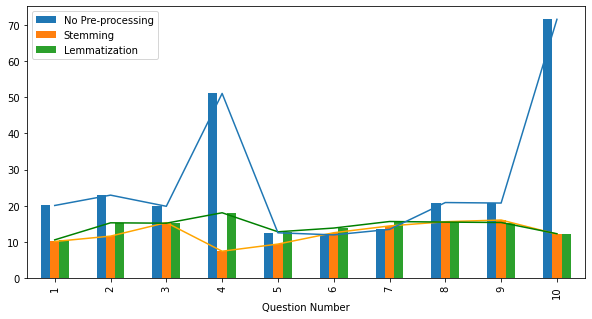

In [45]:
display(mae_per_num.sort_index())
mae_per_num.plot(x='Question Number',kind='bar', figsize=(10,5))
plt.plot(mae_number_stem, color='orange')
plt.plot(mae_number_lm, color='green')
plt.plot(mae_number_ori)
plt.show()

#### Score and Error Value Comparison

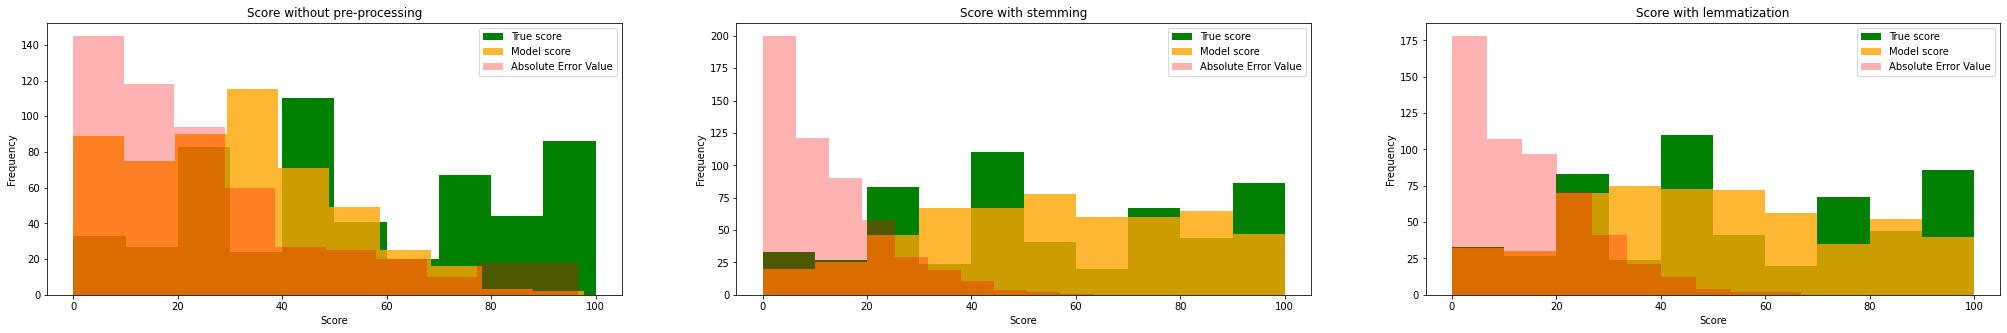

In [46]:
figure, axis = plt.subplots(1, 3, figsize = (35,5))

#Data without pre-processing
axis[0].hist(error_ori['Rata Manual'], label='True score', color='green')
axis[0].hist(error_ori['Model Score'], label='Model score', color='orange', alpha = 0.8)
axis[0].hist(error_ori['Absolute Error Value'], label = "Absolute Error Value", color='red', alpha = 0.3)
axis[0].set_title('Score without pre-processing')
axis[0].set_xlabel('Score')
axis[0].set_ylabel('Frequency')
axis[0].legend()

#Data with stemming
axis[1].hist(error_stem['Rata Manual'], label='True score', color='green')
axis[1].hist(error_stem['Model Score'], label='Model score', color='orange', alpha = 0.8)
axis[1].hist(error_stem['Absolute Error Value'], label = "Absolute Error Value", color='red', alpha = 0.3)
axis[1].set_title('Score with stemming')
axis[1].set_xlabel('Score')
axis[1].set_ylabel('Frequency')
axis[1].legend()

#Data with lemmatization
axis[2].hist(error_lemma['Rata Manual'], label='True score', color='green')
axis[2].hist(error_lemma['Model Score'], label='Model score', color='orange', alpha = 0.8)
axis[2].hist(error_lemma['Absolute Error Value'], label = "Absolute Error Value", color='red', alpha = 0.3)
axis[2].set_title('Score with lemmatization')
axis[2].set_xlabel('Score')
axis[2].set_ylabel('Frequency')
axis[2].legend()

plt.show()


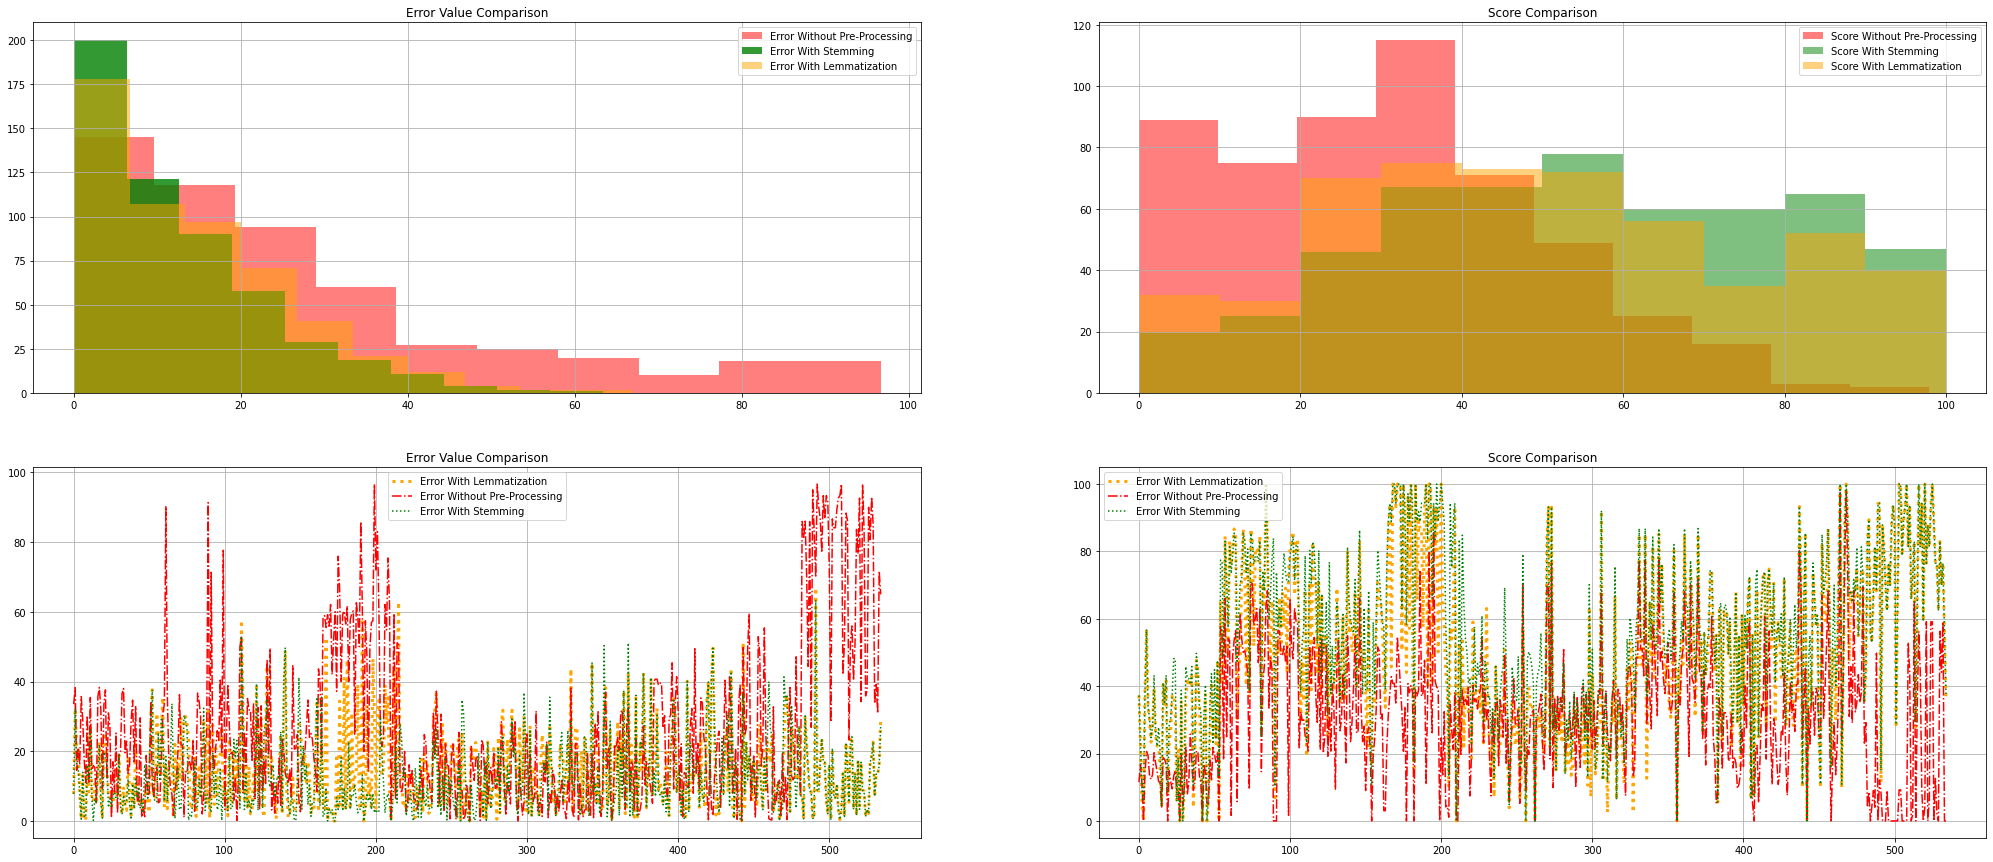

In [47]:
figure, axis = plt.subplots(2, 2, figsize = (35,15))

axis[0,0].hist(error_ori['Absolute Error Value'], label='Error Without Pre-Processing', color='red', alpha = 0.5)
axis[0,0].hist(error_stem['Absolute Error Value'], label='Error With Stemming', color = 'green', alpha = 0.8)
axis[0,0].hist(error_lemma['Absolute Error Value'], label='Error With Lemmatization', linewidth = 3, color='orange', alpha = 0.5)
axis[0,0].set_title('Error Value Comparison')
axis[0,0].legend()
axis[0,0].grid()

axis[1,0].plot(error_lemma['Absolute Error Value'], label='Error With Lemmatization', linewidth = 3, color='orange',  ls = ':')
axis[1,0].plot(error_ori['Absolute Error Value'], label='Error Without Pre-Processing', color='red', ls='-.')
axis[1,0].plot(error_stem['Absolute Error Value'], label='Error With Stemming', color = 'green', ls = 'dotted')
axis[1,0].set_title('Error Value Comparison')
axis[1,0].legend()
axis[1,0].grid()

axis[0,1].hist(error_ori['Model Score'], label='Score Without Pre-Processing', color='red', alpha = 0.5)
axis[0,1].hist(error_stem['Model Score'], label='Score With Stemming', color = 'green', alpha = 0.5)
axis[0,1].hist(error_lemma['Model Score'], label='Score With Lemmatization', linewidth = 3, color='orange', alpha = 0.5)
axis[0,1].set_title('Score Comparison')
axis[0,1].legend()
axis[0,1].grid()

axis[1,1].plot(error_lemma['Model Score'], label='Error With Lemmatization', linewidth = 3, color='orange',  ls = ':')
axis[1,1].plot(error_ori['Model Score'], label='Error Without Pre-Processing', color='red', ls='-.')
axis[1,1].plot(error_stem['Model Score'], label='Error With Stemming', color = 'green', ls = 'dotted')
axis[1,1].set_title('Score Comparison')
axis[1,1].legend()
axis[1,1].grid()
plt.show()

#### Have the highest error

In [48]:
error_lemma.sort_values(by='Absolute Error Value', inplace=True, ascending=False)
error_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
491,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_11,"[brunei, darussalam, negara, memiliki, ibu, ko...",78.333333,50,95,90,0.114403,11.44,75,11,66.893333
215,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_64,"[tuhana, maha, esa, kemanusiaan, adil, adap, p...",85.000000,80,85,90,0.221842,22.18,29,18,62.820000
111,3,"[majapahit, kerajaan, berpusat, jawa, timur, I...",siswa_4,"[berpusat, jawa, timur, puncak, kejayaan, peme...",76.666667,85,70,75,0.190915,19.09,10,25,57.576667
191,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_40,"[ketuhanan, maha, esa, kemanusian, adil, berad...",96.666667,90,100,100,0.395083,39.51,26,18,57.156667
167,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_7,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",98.333333,95,100,100,0.456983,45.70,25,18,52.633333


In [49]:
error_stem.sort_values(by='Absolute Error Value', inplace=True, ascending=False)
error_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
491,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_11,"[brunei, darussalam, negara, milik, ibukota, k...",78.333333,50,95,90,0.149559,14.96,65,11,63.373333
111,3,"[majapahit, raja, pusat, jawa, timur, indonesi...",siswa_4,"[pusat, jawa, timur, puncak, jaya, perintah, h...",76.666667,85,70,75,0.236531,23.65,10,24,53.016667
367,7,"[hukum, perdata, hukum, atur, hubung, individu...",siswa_54,"[hukum, perdata, hukum, hukum, ringan, hukum, ...",8.333333,10,5,10,0.594136,59.41,10,27,51.076667
351,7,"[hukum, perdata, hukum, atur, hubung, individu...",siswa_38,"[hukum, perdata, hukum, hukum, perdana, hukum,...",6.666667,10,0,10,0.569758,56.98,8,27,50.313333
140,3,"[majapahit, raja, pusat, jawa, timur, indonesi...",siswa_43,"[raja, indonesia]",10.000000,10,10,10,0.597435,59.74,2,24,49.740000


In [50]:
error_ori.sort_values(by='Absolute Error Value', inplace=True, ascending=False)
error_ori.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Absolute Error Value
492,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_12,"[indonesia,, malaysia,, filipina,, singapura,,...",96.666667,100,100,90,0.0,0.0,96.666667
199,4,"[-, Ketuhanan, Yang, Maha, Esa,, -, kemanusiaa...",siswa_48,"[1, KETUHANAN, YANG, MAHA, ESA, 2, KEMANUSIAAN...",96.666667,90,100,100,0.0,0.0,96.666667
508,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_37,"[indonesia,, singapura,, malaysia,, brunei, da...",96.666667,100,100,90,0.0,0.0,96.666667
522,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_51,"[Indonesia,Malaysia.Singapura,Thailand,Myanmar...",96.666667,100,100,90,0.0,0.0,96.666667
489,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_9,"[indonesia,, malaysia,, thailand,, filipina,, ...",95.000000,95,100,90,0.0,0.0,95.000000


### Evaluation metrics

In [51]:
eval_ori = round(mae(error_ori['Model Score'], error_ori['Rata Manual']), 2)
eval_stem = round(mae(error_stem['Model Score'], error_stem['Rata Manual']), 2)
eval_lemma = round(mae(error_lemma['Model Score'], error_lemma['Rata Manual']), 2)
print('Mean Absolute Error Value Original= ', eval_ori)
print('Mean Absolute Error Value Stemming= ', eval_stem)
print('Mean Absolute Error Value Lemmatization= ', eval_lemma)

Mean Absolute Error Value Original=  26.47
Mean Absolute Error Value Stemming=  12.45
Mean Absolute Error Value Lemmatization=  14.46


In [52]:
print(mae(error_ori['Model Score'], data['Manual 1 ']))
print(mae(error_stem['Model Score'], data['Manual 1 ']))
print(mae(error_lemma['Model Score'], data['Manual 1 ']))

30.794934579439253
29.347813084112154
29.253420560747664


In [53]:
print(mae(error_ori['Model Score'], data['Manual 2']))
print(mae(error_stem['Model Score'], data['Manual 2']))
print(mae(error_lemma['Model Score'], data['Manual 2']))

35.600429906542054
32.64153271028037
31.85491588785047


In [54]:
print(mae(error_ori['Model Score'], data['Manual 3']))
print(mae(error_stem['Model Score'], data['Manual 3']))
print(mae(error_lemma['Model Score'], data['Manual 3']))

34.01792523364486
30.724186915887856
30.16792523364486


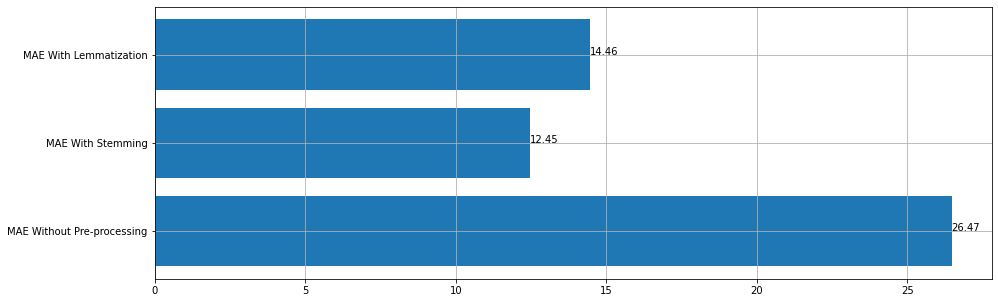

In [55]:
label_mae = ['MAE Without Pre-processing', 'MAE With Stemming', 'MAE With Lemmatization']
value = [eval_ori, eval_stem, eval_lemma]

plt.show()
plt.figure(figsize=(15,5))
plt.grid()
plt.barh(label_mae, value)
 
for index, values in enumerate(value):
    plt.text(values, index,
             str(values))
# plt.bar(label_mae, value)
plt.show()

In [56]:
error_lemma[['Model Score','Rata Manual']].corr().style.background_gradient(cmap="Blues")

,Model Score,Rata Manual
Model Score,1.000000,0.774850
Rata Manual,0.774850,1.000000


In [57]:
error_stem[['Model Score','Rata Manual']].corr().style.background_gradient(cmap="Blues")


,Model Score,Rata Manual
Model Score,1.000000,0.817866
Rata Manual,0.817866,1.000000


In [58]:
error_ori[['Model Score','Rata Manual']].corr().style.background_gradient(cmap="Blues")

,Model Score,Rata Manual
Model Score,1.000000,0.410942
Rata Manual,0.410942,1.000000


#### Final data results

In [59]:
print('Mean Absolute Error Value Stemming Manual Rata-Rata = ', eval_stem)
print('Mean Absolute Error Value Stemming Manual 1= ', mae(error_stem['Model Score'], data['Manual 1 ']))
print('Mean Absolute Error Value Stemming Manual 2= ', mae(error_stem['Model Score'], data['Manual 2']))
print('Mean Absolute Error Value Stemming Manual 3= ', mae(error_stem['Model Score'], data['Manual 3']))
display(error_stem.head())

print('Mean Absolute Error Value Lemmatization Manual Rata-Rata = ', eval_lemma)
print('Mean Absolute Error Value Lemmatization Manual 1= ', mae(error_lemma['Model Score'], data['Manual 1 ']))
print('Mean Absolute Error Value Lemmatization Manual 2= ', mae(error_lemma['Model Score'], data['Manual 2']))
print('Mean Absolute Error Value Lemmatization Manual 3= ', mae(error_lemma['Model Score'], data['Manual 3']))
display(error_lemma.head())

print('Mean Absolute Error Value Without Pre-processing Manual Rata-Rata = ', eval_ori)
print('Mean Absolute Error Value Without Pre-processing Manual 1= ', mae(error_ori['Model Score'], data['Manual 1 ']))
print('Mean Absolute Error Value Without Pre-processing Manual 2= ', mae(error_ori['Model Score'], data['Manual 2']))
print('Mean Absolute Error Value Without Pre-processing Manual 3= ', mae(error_ori['Model Score'], data['Manual 3']))
display(error_ori.head())

Mean Absolute Error Value Stemming Manual Rata-Rata =  12.45
Mean Absolute Error Value Stemming Manual 1=  29.347813084112154
Mean Absolute Error Value Stemming Manual 2=  32.64153271028037
Mean Absolute Error Value Stemming Manual 3=  30.724186915887856


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
491,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_11,"[brunei, darussalam, negara, milik, ibukota, k...",78.333333,50,95,90,0.149559,14.96,65,11,63.373333
111,3,"[majapahit, raja, pusat, jawa, timur, indonesi...",siswa_4,"[pusat, jawa, timur, puncak, jaya, perintah, h...",76.666667,85,70,75,0.236531,23.65,10,24,53.016667
367,7,"[hukum, perdata, hukum, atur, hubung, individu...",siswa_54,"[hukum, perdata, hukum, hukum, ringan, hukum, ...",8.333333,10,5,10,0.594136,59.41,10,27,51.076667
351,7,"[hukum, perdata, hukum, atur, hubung, individu...",siswa_38,"[hukum, perdata, hukum, hukum, perdana, hukum,...",6.666667,10,0,10,0.569758,56.98,8,27,50.313333
140,3,"[majapahit, raja, pusat, jawa, timur, indonesi...",siswa_43,"[raja, indonesia]",10.000000,10,10,10,0.597435,59.74,2,24,49.740000


Mean Absolute Error Value Lemmatization Manual Rata-Rata =  14.46
Mean Absolute Error Value Lemmatization Manual 1=  29.253420560747664
Mean Absolute Error Value Lemmatization Manual 2=  31.85491588785047
Mean Absolute Error Value Lemmatization Manual 3=  30.16792523364486


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
491,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_11,"[brunei, darussalam, negara, memiliki, ibu, ko...",78.333333,50,95,90,0.114403,11.44,75,11,66.893333
215,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_64,"[tuhana, maha, esa, kemanusiaan, adil, adap, p...",85.000000,80,85,90,0.221842,22.18,29,18,62.820000
111,3,"[majapahit, kerajaan, berpusat, jawa, timur, I...",siswa_4,"[berpusat, jawa, timur, puncak, kejayaan, peme...",76.666667,85,70,75,0.190915,19.09,10,25,57.576667
191,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_40,"[ketuhanan, maha, esa, kemanusian, adil, berad...",96.666667,90,100,100,0.395083,39.51,26,18,57.156667
167,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_7,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",98.333333,95,100,100,0.456983,45.70,25,18,52.633333


Mean Absolute Error Value Without Pre-processing Manual Rata-Rata =  26.47
Mean Absolute Error Value Without Pre-processing Manual 1=  30.794934579439253
Mean Absolute Error Value Without Pre-processing Manual 2=  35.600429906542054
Mean Absolute Error Value Without Pre-processing Manual 3=  34.01792523364486


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Absolute Error Value
492,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_12,"[indonesia,, malaysia,, filipina,, singapura,,...",96.666667,100,100,90,0.0,0.0,96.666667
199,4,"[-, Ketuhanan, Yang, Maha, Esa,, -, kemanusiaa...",siswa_48,"[1, KETUHANAN, YANG, MAHA, ESA, 2, KEMANUSIAAN...",96.666667,90,100,100,0.0,0.0,96.666667
508,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_37,"[indonesia,, singapura,, malaysia,, brunei, da...",96.666667,100,100,90,0.0,0.0,96.666667
522,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_51,"[Indonesia,Malaysia.Singapura,Thailand,Myanmar...",96.666667,100,100,90,0.0,0.0,96.666667
489,10,"[Indonesia,, Thailand,, Malaysia,, Singapura,,...",siswa_9,"[indonesia,, malaysia,, thailand,, filipina,, ...",95.000000,95,100,90,0.0,0.0,95.000000


In [60]:
error_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 491 to 356
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No Soal                    535 non-null    int64  
 1   Kunci Jawaban              535 non-null    object 
 2   Siswa                      535 non-null    object 
 3   Jawaban                    535 non-null    object 
 4   Rata Manual                535 non-null    float64
 5   Manual 1                   535 non-null    int64  
 6   Manual 2                   535 non-null    int64  
 7   Manual 3                   535 non-null    int64  
 8   Cosine Similarity          535 non-null    float64
 9   Model Score                535 non-null    float64
 10  Jumlah Kata Jawaban        535 non-null    int64  
 11  Jumlah Kata Kunci Jawaban  535 non-null    int64  
 12  Absolute Error Value       535 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage:

In [61]:
error_lemma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 491 to 210
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No Soal                    535 non-null    int64  
 1   Kunci Jawaban              535 non-null    object 
 2   Siswa                      535 non-null    object 
 3   Jawaban                    535 non-null    object 
 4   Rata Manual                535 non-null    float64
 5   Manual 1                   535 non-null    int64  
 6   Manual 2                   535 non-null    int64  
 7   Manual 3                   535 non-null    int64  
 8   Cosine Similarity          535 non-null    float64
 9   Model Score                535 non-null    float64
 10  Jumlah Kata Jawaban        535 non-null    int64  
 11  Jumlah Kata Kunci Jawaban  535 non-null    int64  
 12  Absolute Error Value       535 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage:

In [62]:
error_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 492 to 356
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No Soal               535 non-null    int64  
 1   Kunci Jawaban         535 non-null    object 
 2   Siswa                 535 non-null    object 
 3   Jawaban               535 non-null    object 
 4   Rata Manual           535 non-null    float64
 5   Manual 1              535 non-null    int64  
 6   Manual 2              535 non-null    int64  
 7   Manual 3              535 non-null    int64  
 8   Cosine Similarity     535 non-null    float64
 9   Model Score           535 non-null    float64
 10  Absolute Error Value  535 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 50.2+ KB
